In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Lets load the Boston house Pricing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
print(df.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [6]:
print(df.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(df.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
print(df.frame)

None


# Preparing The Dataset

In [9]:
dataset = pd.DataFrame(df.data, columns=df.feature_names)

In [10]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
dataset['Price'] = df.target

In [12]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

# Exploratory Data Analysis

In [16]:
# Compute the correlation matrix
corr_matrix = dataset.corr()

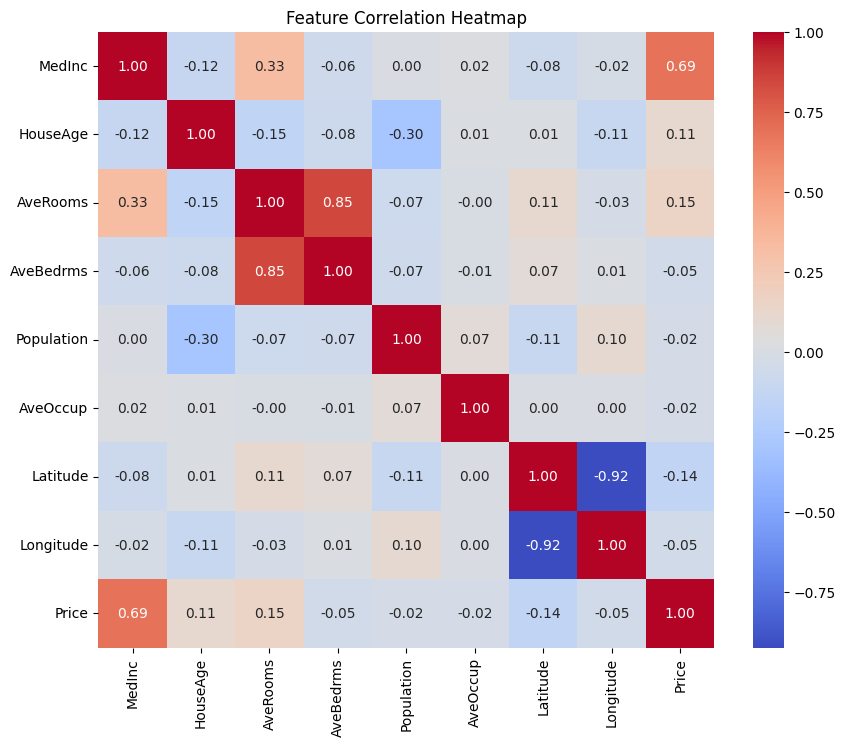

In [17]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [18]:
# sns.pairplot(dataset);

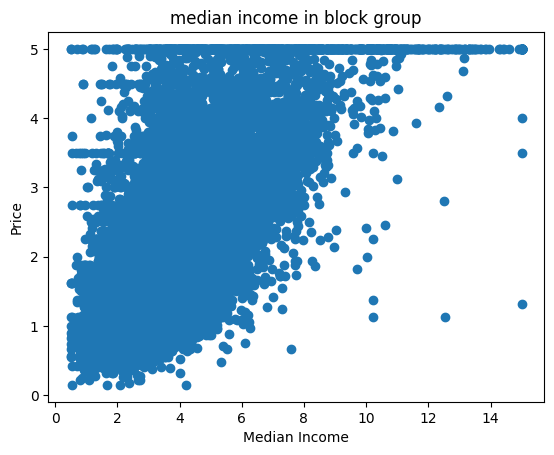

In [19]:
plt.scatter(dataset['MedInc'], dataset['Price']);
plt.xlabel('Median Income');
plt.ylabel('Price');
plt.xticks(rotation=0);
plt.title('median income in block group');

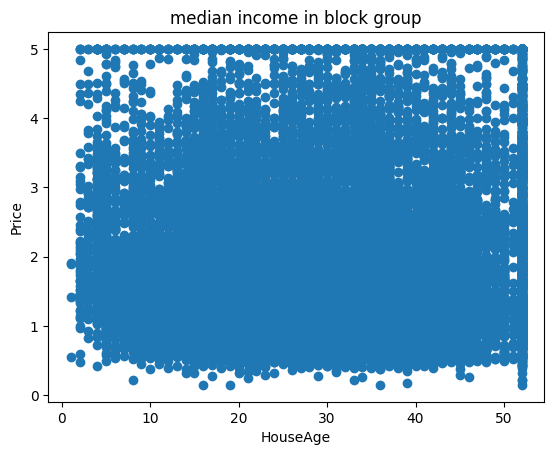

In [20]:
plt.scatter(dataset['HouseAge'], dataset['Price']);
plt.xlabel('HouseAge');
plt.ylabel('Price');
plt.xticks(rotation=0);
plt.title('median income in block group');

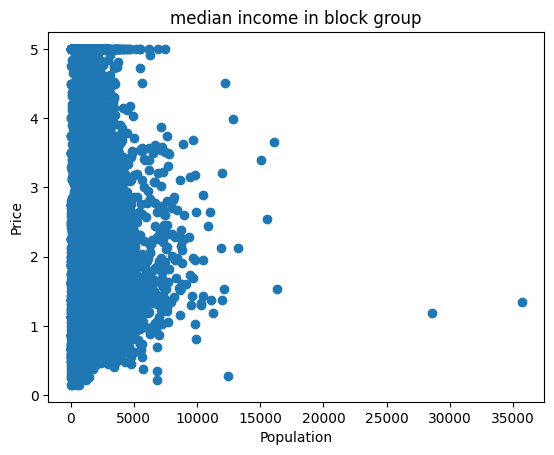

In [21]:
plt.scatter(dataset['Population'], dataset['Price']);
plt.xlabel('Population');
plt.ylabel('Price');
plt.xticks(rotation=0);
plt.title('median income in block group');

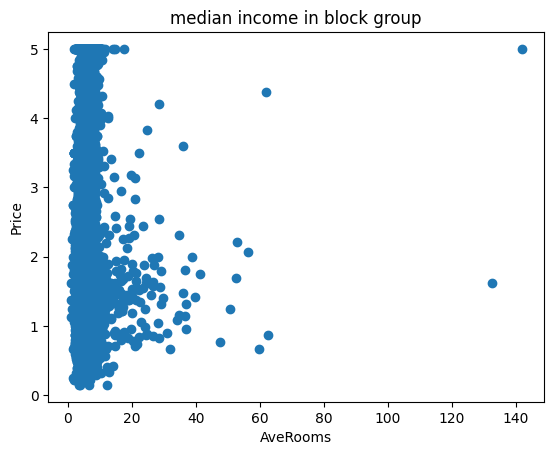

In [22]:
plt.scatter(dataset['AveRooms'], dataset['Price']);
plt.xlabel('AveRooms');
plt.ylabel('Price');
plt.xticks(rotation=0);
plt.title('median income in block group');

<Axes: xlabel='AveRooms', ylabel='Price'>

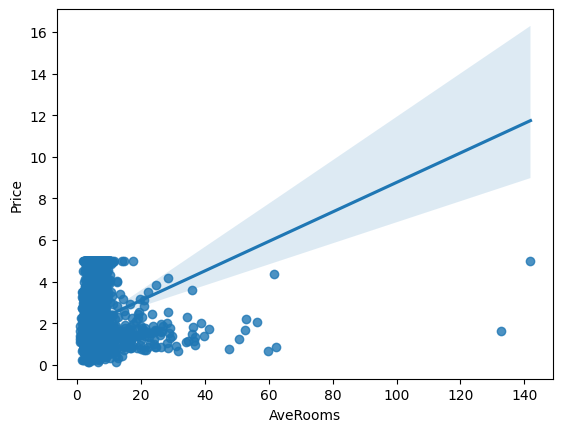

In [23]:
sns.regplot(x='AveRooms', y='Price', data=dataset)

<Axes: xlabel='Latitude', ylabel='Price'>

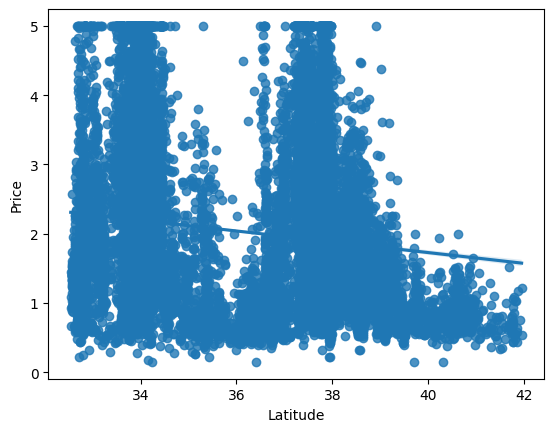

In [24]:
sns.regplot(x='Latitude', y='Price', data=dataset)

## Independent and Dependent Features

In [25]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [26]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

## Train Split Test

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [29]:
Scaler = StandardScaler()

In [30]:
x_train = Scaler.fit_transform(x_train)

In [31]:
x_test = Scaler.transform(x_test)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regression = LinearRegression()

In [34]:
regression.fit(x_train, y_train)

LinearRegression()

In [35]:
print(regression.coef_)

[ 0.81546023  0.11217088 -0.24826788  0.29655893 -0.00580325 -0.02714299
 -0.91511321 -0.88267336]


In [36]:
print(regression.intercept_)

2.065335320459579


In [37]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [38]:
reg_pred = regression.predict(x_test)

In [39]:
reg_pred

array([2.67567865, 1.58581073, 1.07775476, ..., 2.20640557, 2.4210895 ,
       1.42405107])

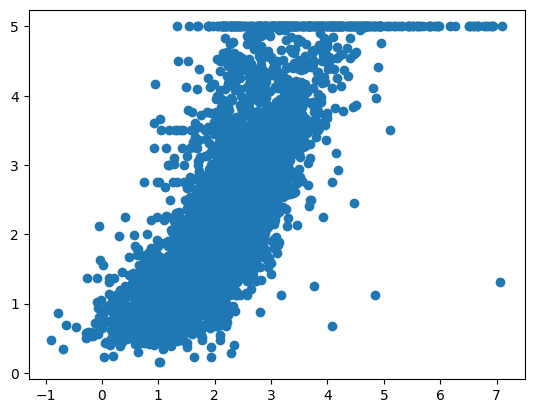

In [40]:
# Plot Scatterplot
plt.scatter(reg_pred, y_test)


In [41]:
residuals = y_test - reg_pred
residuals

18637    1.040321
16447   -0.590811
13650   -0.262755
283      0.734312
5394    -0.101181
           ...   
13433   -0.132266
16320    0.254299
5959     0.082594
7951    -0.283089
15091   -0.124051
Name: Price, Length: 6192, dtype: float64

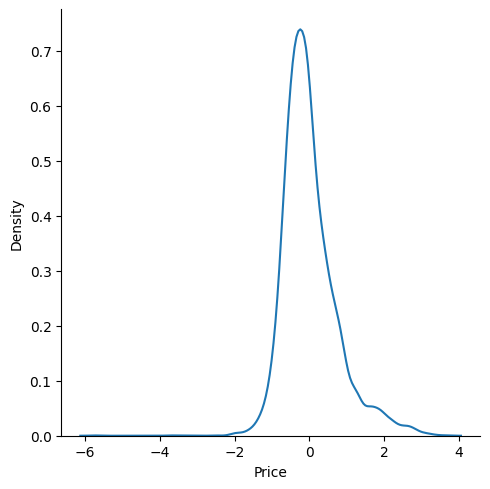

In [42]:
sns.displot(residuals, kind='kde');

### Scatter Plot with respect to predictions and residuals

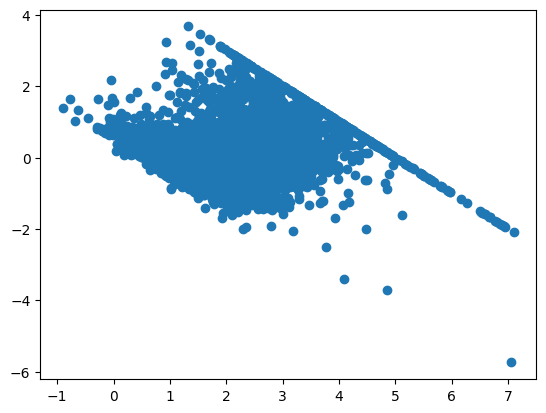

In [43]:
plt.scatter(reg_pred, residuals);

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [45]:
print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

0.5316510754807169
0.5280176816798943
0.7266482516870829


### R Square and Adjusted R Square

In [46]:
from sklearn.metrics import r2_score


score = r2_score(y_test, reg_pred)
print(score)

0.6049098730625704


In [47]:
# Display Adjusted R-Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6043986776856498

## New data Prediction

In [48]:
df.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [49]:
Scaler.transform(df.data[0].reshape(1,-1))

C:\Users\Neural Networks\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33108267,  0.98361456,  0.56921032, -0.14499211, -1.01361647,
        -0.07071849,  1.04798137, -1.32397628]])

In [50]:
regression.predict(Scaler.transform(df.data[0].reshape(1,-1)))

C:\Users\Neural Networks\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.10967687])

In [51]:
# Pickling The Model file for Deployment

In [52]:
import pickle

In [53]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [54]:
# pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [55]:
pickled_model.predict(Scaler.transform(df.data[0].reshape(1,-1)))

C:\Users\Neural Networks\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.10967687])